In [6]:
import argparse
import torch

import matplotlib.pyplot as plt
import torch.multiprocessing as mp

from ga_t3.ga_model_runner import GAModelRunner
from ga_t3.base_model_runner import GpuRunnner

parser = argparse.ArgumentParser(description="Language transfer")

# main parameters
parser.add_argument("--number_of_gpus", type=int, default=1)
parser.add_argument("--models_per_gpu", type=int, default=1)
parser.add_argument("--number_of_iterations", type=int, default=100)
parser.add_argument("--log_ga_into_file", type=bool, default=True)
parser.add_argument("--verbose", type=bool, default=True)
parser.add_argument("--ga_use_random_exchange", type=bool, default=False)
parser.add_argument("--ga_population_size", type=int, default=20)
parser.add_argument("--use_neural_crossover", type=bool, default=False)
parser.add_argument("--use_neural_estimator", type=bool, default=True)
parser.add_argument("--neural_estimator_iteration_start", type=int, default=1000)
parser.add_argument("--ga_neural_estimator_iterations_per_ga_iteration", type=int, default=1)
parser.add_argument("--neural_crossover_iteration_threshold", type=int, default=200)
parser.add_argument("--exchange_best_every_n_iterations", type=int, default=10)
parser.add_argument("--select_best_of_group", type=int, default=5)
parser.add_argument("--distribute_best", type=int, default=10)


params = parser.parse_args([])
print(params)

processes = []

params.number_of_gpus = 1
params.models_per_gpu = 1
params.log_ga_into_file = False
params.verbose = True

params.ga_use_random_exchange = False
params.ga_population_size = 20

params.exchange_best_every_n_iterations = 1
params.select_best_of_group = 5
params.distribute_best = 5
params.my_device = 'cuda'

gpu_num = params.number_of_gpus
model_num = params.models_per_gpu

ga_model_runner = GAModelRunner(gpu_num, model_num, params)
accumulatove_runner = ga_model_runner.accumulative_runner

def model_runner_factory(gpu_num, model_num, params):
    return ga_model_runner

gpu_runner = GpuRunnner(gpu_num, params, model_runner_factory)

gpu_runner.iterate(params.number_of_iterations)



Namespace(number_of_gpus=1, models_per_gpu=1, number_of_iterations=100, log_ga_into_file=True, verbose=True, ga_use_random_exchange=False, ga_population_size=20, use_neural_crossover=False, use_neural_estimator=True, neural_estimator_iteration_start=1000, ga_neural_estimator_iterations_per_ga_iteration=1, neural_crossover_iteration_threshold=200, exchange_best_every_n_iterations=10, select_best_of_group=5, distribute_best=10)
Creating transformers
0.210561 M parameters
Transformer created 0
0.210561 M parameters
Transformer created 1
0.210561 M parameters
Transformer created 2
0.210561 M parameters
Transformer created 3
0.210561 M parameters
Transformer created 4
0.210561 M parameters
Transformer created 5
0.210561 M parameters
Transformer created 6
0.210561 M parameters
Transformer created 7
0.210561 M parameters
Transformer created 8
0.210561 M parameters
Transformer created 9
0.210561 M parameters
Transformer created 10
0.210561 M parameters
Transformer created 11
0.210561 M paramet

Average loss=1.309021234512329, total_samples=74
Time of iteration is 0.07433080673217773, it=5, gpu=1
GAModelRunnner step : 0.074331 s
Ended iteration 4 on gpu 1, taken = 0.07433080673217773, time/iteration = 0.07433080673217773, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 5 on gpu 1
iteration=5
xy: f=6.0009640561065165, d=LBQO3FARF1CJH9MKZLHGZ8CID2A47PDPA52XNXAAO7GUA
xy: f=6.000939628080119, d=LBQO3FARF1QL0V0QJHHDZ8CFD2A47PDPA52XNXAAONGUA
xy: f=6.000733940283302, d=LBQO3FARF1QL0V0SJHHDZ8CFD2A47PDPA52XNXAAONGUA
xy: f=6.000623364752006, d=VBQO3FARF1QL0V0DJL3DZ8CID2A97PDPA52XNXAAO7GUA
xy: f=6.000356001341223, d=LBQOIFARW1YL0W0QJH6X95CFS2A4SPDPA52XNAAAO7GUA
xy: f=6.000230803398429, d=LBQOIFARW1YL0W0QJH6195CN03FAS5DPA52XNXAAO7BUA
xy: f=6.000183636455608, d=LBQOIFARW1YL0W0QJH6DZ8CFD2A47PDPA523NXAAONGUA
xy: f=6.000088556095239, d=LBQO3FARF1CJH9MKZLHGZ8CID2A47PDPA52XNXAAO7GUA
xy: f=6.000076681358625, d=LB1OIFARW1YL0W0QJH6195ZN03FAS5DPA55XNXAAO7BUA
xy: f=5.0007318262190

Average loss=0.7407522797584534, total_samples=154
Time of iteration is 0.08585381507873535, it=11, gpu=1
GAModelRunnner step : 0.085854 s
Ended iteration 10 on gpu 1, taken = 0.08585381507873535, time/iteration = 0.08585381507873535, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 11 on gpu 1
iteration=11
xy: f=8.0008249571004, d=LBQO8GARF0QL0V0DJNHTZ8C0D2AR7PDPA52XNXAAO7BUA
xy: f=7.000827921123474, d=LBQOGGARFPQL0V0PJL3DZ8CG52A47UWPA52XVXAAO7GUA
xy: f=7.000713344993939, d=LBQO8GARF0QLTV0Q3H6X98CID2A97PSPA52XNXAAO7GUA
xy: f=7.0006050962672415, d=LBHO8GARI0QL0V0PJL3DZ8CG5RA47PWPA52XNXAAONTUL
xy: f=7.000573618732537, d=LBQOGGARFPQL0V0PJL3DZ1CG52A47UWPA52XVXAAOXGUA
xy: f=7.000471463080516, d=LBQOGGARFPQL0V0PJL3DZ8CG52A47UWPA52XVXAAO7GUA
xy: f=7.000336901021609, d=LBQO8GARF0QL0V0PJL3DZ8CG5RA47PWPA52XNXAAONTUL
xy: f=7.000298693120897, d=LBHO8GARI0QL0V05JNHTZ8C0D2AR7PSPA52XNXAAONGUL
xy: f=7.000210990409574, d=LBQO8GARF0QL0V0Q3H6X98CPD2A47PBPA52XNAAAOLGUA
xy: f=7.000139223

Average loss=1.0410858392715454, total_samples=236
Time of iteration is 0.08708405494689941, it=17, gpu=1
GAModelRunnner step : 0.087084 s
Ended iteration 16 on gpu 1, taken = 0.08708405494689941, time/iteration = 0.08708405494689941, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 17 on gpu 1
iteration=17
xy: f=9.000665509777471, d=LBQ38GARF0QLTV0Q3HRX98CIG2AR7PDPA02XFXAAO7BUX
xy: f=9.00043804655448, d=LBQO8GARF0QLTV0Q3HRL98CIG2AR7PDPAG2XNXAAO7BUX
xy: f=9.000172003178468, d=LBQO8GARF0QLTV0Q3HRX98CIG2AR7PDPA02XNXAAO7BUX
xy: f=8.00098011944069, d=EBHORGARY0QLTV0Q3H6X98CIDMAR7PDPA52XNXAA07BUA
xy: f=8.000975252073777, d=LBHFRGARIVQL0V0Q3H6X08AID2AO7PSUA52XNXAAO7BUX
xy: f=8.000583089630185, d=LBQOGGARFPQL0V0PJL3DZ1CG52A47MWPA52XNXAA07BUA
xy: f=8.00049392852962, d=LBQOGGARFPQL0V0PJL3DZ8C0DHAR7PDPA52XNXAAO7BU4
xy: f=8.000373301270642, d=LBCN8GARF0QLTV0Q3H6X98CIDSA4ZZDPA52XLXAAO7BUX
xy: f=8.000365855037659, d=LBQOGGARFPQL0V0PJL3DZ8C0DHAR7PDPA52XNXAAO7BUA
xy: f=8.00021372621

Average loss=2.043729782104492, total_samples=316
Time of iteration is 0.07122802734375, it=23, gpu=1
GAModelRunnner step : 0.071228 s
Ended iteration 22 on gpu 1, taken = 0.07122802734375, time/iteration = 0.07122802734375, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 23 on gpu 1
iteration=23
xy: f=11.000166066418243, d=LBQ3UGARMFQL9V0Q3HRX98MUG2AR7PDPA02XFXAAOABUX
xy: f=10.000822381611057, d=LBQOGGARFPQLTV0Q3HRX98CIG2AR7PDPA02XFXAAOABUX
xy: f=10.000462890223204, d=LB8FRGAKIFQL9VFQ3HRX98MIG2ARQP1PA02XFXAAV7BUA
xy: f=10.00039709257932, d=LB8FRGARI08LTX0Q3HRX98CIG2AR7QDPA02XFXAAOABUX
xy: f=10.000393163589534, d=LBQ38GARMFQL9V0Q3HRX98MIG2AR7PDPA02XFXAAV7B1X
xy: f=10.000358904412954, d=LB8FRGARI08LTX0Q6HRX98CIG2AR7QDPA02XFXAAOABUX
xy: f=10.000250856637109, d=LBQOGGARF7QLTV0Q3HRX98VIG2AR73DPA02XFXAAOABNX
xy: f=10.000249007792076, d=LBQ38GARMFQL9VFQ3HRX98MIG2ARQPDPA02XFXAAV7BUA
xy: f=10.000003251192837, d=LBQ3UGARMFQL9V0Q3HRX98MUG2AR7PDPA02XFXAAV7B1X
xy: f=9.0009206119

Average loss=0.990598738193512, total_samples=392
Time of iteration is 0.07300090789794922, it=29, gpu=1
GAModelRunnner step : 0.073001 s
Ended iteration 28 on gpu 1, taken = 0.07300090789794922, time/iteration = 0.07300090789794922, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 29 on gpu 1
iteration=29
xy: f=11.0008389577704, d=MBQK8GARMFVX9VUQ3H7X98MIG5A77PDPA02XFXAAOABUX
xy: f=11.000780556106347, d=9BQ3UGARMFQZ9VLQ3HRX98MUG2AU7PDPA02XFXAAOABUX
xy: f=11.000745440905925, d=9B8FRGARMNQL3V0Q3HRX98MIG2AR7PDPA02XFXAAVABUX
xy: f=11.000731585253883, d=LBQ3UGARMFQL9VUQ3H7X9FMIG5A77PDPA02XFXAAOABUX
xy: f=11.00070118122662, d=LBQ3UGARMFQL9V0Q3HRX98MIG2AD7PDPA02XFNAAOABUX
xy: f=11.00056517678185, d=LBQ3UGARMFQL9V0R3HR698MIG2AR7PDPA02XFXAAVABUX
xy: f=11.000483690873454, d=LBQ3MGARMFQL9V0Q3HRX98MIG2AA7PXPA02GFXAAOABUX
xy: f=11.00044148782171, d=LBQ3UGARMFQL9V0Q3HRX98MUG2AR7PDPA02XFXAAOABUX
xy: f=11.000405914156003, d=LBQFIGARMFQL9V0A3HRX98MUG2AR7PDPA02XFXA0OABUX
xy: f=11.0003

Average loss=1.1663881540298462, total_samples=473
Time of iteration is 0.07186484336853027, it=35, gpu=1
GAModelRunnner step : 0.071865 s
Ended iteration 34 on gpu 1, taken = 0.07186484336853027, time/iteration = 0.07186484336853027, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 35 on gpu 1
iteration=35
xy: f=12.000994577101988, d=9B8BRGARPNQL9VUQ3H7X9FMFG5A77PDPA02XFXAAOABUX
xy: f=12.00099190102218, d=9B8BUGARSQQL9L0Q3HQX98M4G2AR7P9PA02XFQAAOABUX
xy: f=12.000902674525433, d=9B8BRGARMNQL9L0Q3HQX98M4G2AR7P9PAY2XF7AAOABUX
xy: f=12.000710292281909, d=9B8BRGARSQQL9L0Q3HQX98M4G2AR7P9PA02XFQAAOABUX
xy: f=12.000704876662132, d=9B8BRGARMNQL9VUQ3H7X9FMQG5A77PDPA028FXAAOABUX
xy: f=12.000686610641742, d=9B8BRGARMNQL9VUQ3H7X9FMBG2AR7PDPA02K3XAAOABUN
xy: f=12.000669621288946, d=9B8BRGSRMFQY9V0AHKRX98MUGEAR7PDPA02XFXAANABUX
xy: f=12.000507339944685, d=9B8BUGARSFQL9L0Q3HQX98M4G2AR7PDPA02XFXAAOABUN
xy: f=12.000473174775264, d=XB8BRGSRMFQY9V0AHHRX98MUGEAR7PDPA02XFXAAOABUX
xy: f=12

Average loss=1.0114796161651611, total_samples=552
Time of iteration is 0.07399797439575195, it=41, gpu=1
GAModelRunnner step : 0.073998 s
Ended iteration 40 on gpu 1, taken = 0.07399797439575195, time/iteration = 0.07399797439575195, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 41 on gpu 1
iteration=41
xy: f=14.000711505176433, d=9B8BRGARMNQL9V0AJARX98MLG5A7KPDPA02XFXAAOABUX
xy: f=14.000610831270416, d=9B8BRGARMNQL9V0AJARX98MLGEARZPDPA02XRXAJOABAX
xy: f=14.000046729225263, d=9B8BRGARMNQL9V0AJAR59EMLGEARZPDPA02XRXAJOABAX
xy: f=13.000874061541891, d=9B8BRGARMNQL9V0AHHRX98MUGEA77PDVA02X2XAAOABUX
xy: f=13.000808492680662, d=9B8BRGARMNQL7V1AHNRX98MUGEA77PDVA02X2XAAOABUX
xy: f=13.000686057909965, d=9B8BRGARMNQL9V0AHNRX98MUGEA77PD5A02XFXAAOABUX
xy: f=13.000623746948323, d=9B8BRGARMNQL9V0AHHRX98MUG5A77PDPA09XFXAAOABUX
xy: f=13.000598501922939, d=9B8BRGARMNQL9V0AJARX98MLGEARZPDP402XRXAJOABAX
xy: f=13.000487059643625, d=9B8BRGARMNQL5V0AHHRX98MUG5A7ZPDPA02XRXAJOABAX
xy: f=1

Average loss=2.4891676902770996, total_samples=630
Time of iteration is 0.07474899291992188, it=47, gpu=1
GAModelRunnner step : 0.074749 s
Ended iteration 46 on gpu 1, taken = 0.07474899291992188, time/iteration = 0.07474899291992188, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 47 on gpu 1
iteration=47
xy: f=16.0009079246347, d=9B8BDGARM6QH9Y0AJARX9AMLGEARKPDPA02XFXAAOABAX
xy: f=16.00034420409608, d=9B8BDGARM6QHZV0AJARX9AMLGLARZPDTAL2XSXAJOABAX
xy: f=15.0009464918791, d=9B8BDGARM6QH9D0AJARX9AMLGEARZPDTA02XRXAJOABAM
xy: f=15.000932902145355, d=9B8BRGARMN0L9V0AJARX98MLGEARZPDPA02XFXAAOABAX
xy: f=15.000786452286127, d=9B8BRGARMEQL9Z0ARARX98MLGEARZVDPA02XRGAJOABAM
xy: f=15.000761497603174, d=9B8BOGARM0QL9V0AJARX98MLGEARZVDPA02XRGAJOABAM
xy: f=15.000742360613089, d=9B8BOGARM0QL9V0AJASX9AMLGEARZPDPA02XRXAJOABAM
xy: f=15.000723664571623, d=9B8BDGARM6QH9V0AJARX9AMLGEARZPDTA02XRXAJOABAM
xy: f=15.000613043890823, d=9B8BRGARMN0L9V0AJARX98MLGEARZPDPA02XFXAAOABAX
xy: f=15.000

Average loss=2.132326126098633, total_samples=713
Time of iteration is 0.07107901573181152, it=53, gpu=1
GAModelRunnner step : 0.071079 s
Ended iteration 52 on gpu 1, taken = 0.07107901573181152, time/iteration = 0.07107901573181152, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 53 on gpu 1
iteration=53
xy: f=17.00092646168202, d=9B8BAGARMKQL9UHAJAVX9AMLGLARZPDTAL2XSXAJ8ABAX
xy: f=17.00058780461817, d=9B8BAGARM0QLED0AJARX9AMLGNARKPDPA22XV9AAOABAX
xy: f=17.000491796401683, d=9B5BAGARM0QL9D0AJA0X9AMLG0ARZPDOA027FXAATABAX
xy: f=17.000296158925213, d=9B8BAGARM0QL9D0AJARXYAMLG0AROPDTA22XFXAAOABAX
xy: f=17.000236122600914, d=GB8BAGARM0NI9V0AJARX9AMLG0ARZPDTA22XVXAAOABAX
xy: f=17.00015841664365, d=9B8BAGARYK8L9UHAJAVX9AMLGLARZPDTAL2XSXAJ8ABAX
xy: f=17.00004551392654, d=9B8BAGARM0QL9D0AJARX9AMLG0ARZPDTA22XFXAAOABAX
xy: f=17.000029272488746, d=9B8BAGARM0QL9D0AJARX9AMLG0ARZPDTA22XVXAAOABAX
xy: f=16.000955229323093, d=9B8IAGARM0QL9D0AJARX9AMLG0ARZPDTA22FFXAAOABAX
xy: f=16.000

Average loss=3.514287233352661, total_samples=796
Time of iteration is 0.07299923896789551, it=59, gpu=1
GAModelRunnner step : 0.072999 s
Ended iteration 58 on gpu 1, taken = 0.07299923896789551, time/iteration = 0.07299923896789551, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 59 on gpu 1
iteration=59
xy: f=19.000956064445297, d=9BABAGARM0QLZ10AJARXYAMLG0AROPATA22XFXAAOABAX
xy: f=18.000816511334754, d=GB8BAGARM0QL9D0ABARXYAMDG0AROTDTA227FXAATABAX
xy: f=18.000648335568155, d=RBABAGARM0QL9D0AJARXTAMDG0AROPCTA227FXAATABAX
xy: f=18.000570974451904, d=GB8BAGARM0QO9D0ABARXYAMDG0AROTDTA22SFBAAOABAY
xy: f=18.000566305927627, d=GB8BAGARM0QL9D0ABARXYAMDG0AROTDTA227FXAATABAX
xy: f=18.000461061267888, d=9BABAGARM0QLZ10AJARXYAMLT0AROPATA22XFXAAOABA2
xy: f=18.00041561851332, d=RBABAGARM0QL9D0ABARXYAMDG0AROTDTA22BFXAATABQX
xy: f=18.00034885445879, d=RBABAGARM0QL9D0AJARXYAMDG0AROJDTA22SFXAAOABAY
xy: f=18.000166259834746, d=9B5BAGAMM0QLZ10AJARXYAMLG0AROPATA22XFXAAOABAX
xy: f=17.0

Average loss=2.7924880981445312, total_samples=874
Time of iteration is 0.06672263145446777, it=65, gpu=1
GAModelRunnner step : 0.066723 s
Ended iteration 64 on gpu 1, taken = 0.06672263145446777, time/iteration = 0.06672263145446777, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 65 on gpu 1
iteration=65
xy: f=19.00088262245102, d=9BABAGARWOQO9D0ABARXYAMDG0AR3TSTA22XDEAAOABAX
xy: f=19.0005504282519, d=9BABAGARWRCOFD0ABARCYAMDG0AR34STA22XDEAAMABAX
xy: f=19.000413293314054, d=9BABAGARWOQO9D0ABARXYAMDGWAROTTTA02SFBAAOABAY
xy: f=19.000309371913833, d=9BABAGARM0QLZ10AJARXYAMLG0ARTPATA22XFXAAOABAX
xy: f=19.0002945379848, d=9BABAGARWOCO9D0ABARXYAMDG0AR34STA22XDEAAOABAX
xy: f=19.000277474596803, d=RBABAGARM0QL9M0ABARXTAMDG0ARDPCTA227F1AATABAX
xy: f=19.000223585410804, d=9BABAGARM0QLZ10AJARXYAMLG0ARTPATA22XFXAAOABAX
xy: f=19.000163040154348, d=9BABAGARWOCO9D0ABARXYAMDG0ARZ4STA22XDEAAOABAY
xy: f=19.0000770501547, d=RBABAGARM0QL9M0ABARXTAMDG0ARDPCTA227F1AATABAX
xy: f=19.00007

Average loss=2.4846694469451904, total_samples=957
Time of iteration is 0.08025026321411133, it=71, gpu=1
GAModelRunnner step : 0.080250 s
Ended iteration 70 on gpu 1, taken = 0.08025026321411133, time/iteration = 0.08025026321411133, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 71 on gpu 1
iteration=71
xy: f=20.000662775947387, d=9BABAGAXM0QLZD0ABAOBSAMDGAAROTDCA22XDEAAOABAX
xy: f=19.000860594368522, d=9BABAGASWRCOQD0ABARCYAMDG0AR34STA22XHEAAMABAX
xy: f=19.000718201115912, d=9BABAGARWDCOF90ABA5CYAMDG0AR34STA22XHEAAMABAX
xy: f=19.000477100398122, d=9BABAGARWRCOFD0ABARCWAMDG0AR34STA22XVEAANABAX
xy: f=19.00021995703385, d=9BABAGARWRCOFD0ABARCYAMDGWAROTTTA02I8BAAOABAY
xy: f=19.000172750415118, d=9BABAGAJWOQO9D0ABARX5AMDG0AR3TSTA22XFXAAOABAX
xy: f=19.000041053698975, d=9BABAGARM0QLZ10AJARXYAMLG0ARTPATA22XFXAAOABAX
xy: f=19.000025898122097, d=9BABAGARM0QLZD0ABAOBYAMDGAAROTDTA02I8BAAO9BAY
xy: f=18.00083739271946, d=9BABAGARUOQO9D0ABARVYAMDG0AR3TS0AX2XDKAAOAB1Y
xy: f=18.

Average loss=2.51432466506958, total_samples=1037
Time of iteration is 0.06739187240600586, it=77, gpu=1
GAModelRunnner step : 0.067392 s
Ended iteration 76 on gpu 1, taken = 0.06739187240600586, time/iteration = 0.06739187240600586, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 77 on gpu 1
iteration=77
xy: f=20.000833927553124, d=9BABAGARIQQLZD0ABAOBSAMDGAAROTDCA22XDEAAOABAX
xy: f=20.00076266784317, d=9BABSGARI0QHZD4ABA6BSAMAGAA2QTDCA22XDEAAOABAX
xy: f=20.00075709064361, d=9BABAGARIQQLZD0ABASBSAMDGAARNTDCA22XDEAAKABAX
xy: f=20.000727255924822, d=9BABAGAXM0QLZD0ABAOBSAMDGAAROTDCA22XDEAAOABAX
xy: f=20.000725080475775, d=9BABAGASW0QKZD0ABAOBSAMDGAAROTDCA22XDEAAOABAX
xy: f=20.000541499188746, d=RBABAGAWWJQO9DLABASBSAMDGAARNTDCA21XDEAA1ABAX
xy: f=20.000115004993255, d=9BABAGASW0QKZD0ABAOBSAMDGAAROTDCA22XDEAAXABAT
xy: f=20.000068937675444, d=RBABAGAWI0QHZD4ABA6BS1MAGAA2QTDCA22XDEAAOABAX
xy: f=19.00068385860984, d=RBABAGAKW8QO9DLABASBSAMDGAOR0TDCA21XDEAA1ABAX
xy: f=19.00

Average loss=1.7570130825042725, total_samples=1118
Time of iteration is 0.07494902610778809, it=83, gpu=1
GAModelRunnner step : 0.074949 s
Ended iteration 82 on gpu 1, taken = 0.07494902610778809, time/iteration = 0.07494902610778809, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 83 on gpu 1
iteration=83
xy: f=20.000946499206012, d=9BABSGARIQQHZD4ABA6BSAMAGAA2QTDCA22XDEAAOABAX
xy: f=20.00085160511654, d=9BABAGARIQQXZD0ABAOBDAMDGAARNTDCA229DEAAKABAX
xy: f=20.00079446939095, d=9BABAGAXM0QLZD0ABAOBSAMDGAAROTDCA22XDEAAXABAT
xy: f=20.000687543749677, d=2BABAGAWYDQOZD0ABAOBSAMDGAAROTDCA22XDEAAXABAT
xy: f=20.000565544620965, d=2BABAGAWYDQOZD0FBAWBSAMAGAA2QTDCAO5XDEAAOABAX
xy: f=20.000514631454564, d=9BABSGARI0QHZD4ABA6BSAMAGAA2WTDQA22XDEAAOABAX
xy: f=20.000491229834143, d=9BABSGARI0QHZD4ABA6BSAMAGAA2QTDCA22XDEAAOABAX
xy: f=20.000455845772198, d=9BABPGARIQQHZD4ABA6BSAMAGAA2QTDCA22XDEAAOABAX
xy: f=20.000434103181536, d=9BABAGAXM0QLZD0ABAOBSAMDGAAROTDCA22XDEAAOABAX
xy: f=20

Average loss=1.1734752655029297, total_samples=1198
Time of iteration is 0.07093524932861328, it=89, gpu=1
GAModelRunnner step : 0.070935 s
Ended iteration 88 on gpu 1, taken = 0.07093524932861328, time/iteration = 0.07093524932861328, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 89 on gpu 1
iteration=89
xy: f=22.00094984951201, d=ABABAGAWYDQOZD0ABA6ESAMAGAAHOTDCA22XDIAAXABAT
xy: f=22.000290713274413, d=ABABAGAWYDQOZDCABAXESAMAGAAHYTDCA22XDEAAXABAT
xy: f=21.00091256205396, d=2BABAGAWYDQOZD4ABA6ESAMAGAAHOTDWA22XDEAAXABAY
xy: f=21.000744716716003, d=ABABAGAWYDQOZD0ABAOBXAMDGAA2WTDCA22XDEAAKABAX
xy: f=21.000645756258372, d=ABABAGAWYDQOZD0ABAOVXAMDGAARNTDCA22YDBAAXABA2
xy: f=21.000592430996164, d=ABABAGAVYDQOZD0ABAOBDAMDGAARNTDCA22YDBAAQABAI
xy: f=21.000543937794237, d=2BABAGACYDEOZD0ABAOESAMAGAAHOTDCA22XDEAAXABAT
xy: f=21.000272595324414, d=2BABAGACYDEOZD0ABAOESAMAGAAHOTDCA22XDEAAXABAT
xy: f=21.000201176398217, d=ABABAGAWYDQOZD0ABAOBDAMDGAARNTDCA22YDBAAKABAX
xy: f=21

Average loss=1.597902774810791, total_samples=1276
Time of iteration is 0.07268857955932617, it=95, gpu=1
GAModelRunnner step : 0.072689 s
Ended iteration 94 on gpu 1, taken = 0.07268857955932617, time/iteration = 0.07268857955932617, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 95 on gpu 1
iteration=95
xy: f=22.00099479973411, d=ABABAGAWYDQOZDCABAXESAMAGAAHYTDCA22XDEAAXABAT
xy: f=22.000964854344698, d=ABABAGAWYDQOZD0ABATESAMAGAAHOTDCA22XDEAAKABAX
xy: f=22.00092570314659, d=ABABAGAWYDQOZD0ABA6ESAMAGAAHOTICA2IXBIAAXABA2
xy: f=22.00083251382737, d=ABABAGAWYDQOZD0ABATESAMAGAAHOTICA22XBVAAXABA2
xy: f=22.00072161839163, d=ABABAGAWYDQOZD0ABA6ESAMAGAAHOT4IA22XBCAAXABA2
xy: f=22.000713290212424, d=ABABAGAWYDQOZD0ABA6ESAMAGAAHOTICA22XBIAAXABA2
xy: f=22.000373367262046, d=ABABAGAWYDQOZD0ABA6ESAMAGAAHOTICA22XBIAAXABA2
xy: f=22.000061791340098, d=ABABAGAWYDQOZD0ABA6ESAMAGAAHOTDCA22XDEAAKABAX
xy: f=22.00002744342077, d=ABABAGAWYVQOZI0ABAHESAMAGAAHOTDWA22XD2AAXABA2
xy: f=21.000

In [2]:
hist = accumulatove_runner.get_histogram()
   

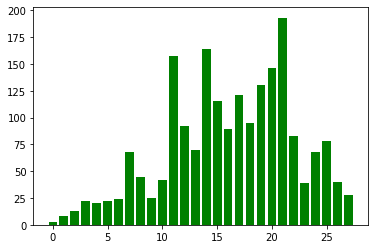

In [3]:
plt.bar(list(hist.keys()), hist.values(), color='g')
plt.show()

In [4]:
accumulatove_runner.predict('ABABAGALAMAGAABABAGALAMAGAABABAGALAMAGAABABAG')

22.441896438598633

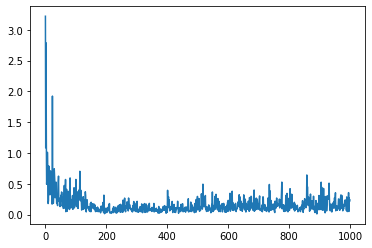

In [5]:
plt.plot(accumulatove_runner.get_loss_history())
plt.show()